In [ ]:
import pandas as pd
import nltk
import gensim
import pickle
import numpy as np

import gensim
from gensim import corpora
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.utils import simple_preprocess
import sklearn
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.cluster import AffinityPropagation
from scipy.spatial import distance
from sklearn.feature_extraction.text import CountVectorizer

# Visualization & topic modelling
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
!pip install --user pyLDAvis
import pyLDAvis
import pyLDAvis.gensim
import pyLDAvis.gensim_models as gensimvis
import plotly
import plotly.express as px

# utility modules
from ast import literal_eval


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
/shared-libs/python3.9/py/lib/python3.9/site-packages/plotly/express/imshow_utils.py:24: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),


In [ ]:
# Load corpus_words from the pickle file
with open('/work/GitHub_ML_Deepnote/Machine Learning/3. Word2vec /corpus_words.pkl', 'rb') as file:
    corpus_words = pickle.load(file)

In [ ]:
dictionary = corpora.Dictionary(corpus_words)
doc_term_matrix = [dictionary.doc2bow(i) for i in corpus_words]

In [ ]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

In [ ]:
# Build LDA model
corpus_LDA = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=10, random_state=100,
                chunksize=1000, passes=50,iterations=100)

In [ ]:
corpus_LDA.print_topics()

[(0,
  '0.026*"ai" + 0.012*"think" + 0.009*"would" + 0.008*"clip" + 0.008*"paper" + 0.008*"people" + 0.007*"go" + 0.007*"factory" + 0.007*"say" + 0.007*"could"'),
 (1,
  '0.023*"ai" + 0.018*"human" + 0.015*"think" + 0.011*"im" + 0.011*"one" + 0.009*"get" + 0.009*"consciousness" + 0.009*"dont" + 0.007*"would" + 0.006*"u"'),
 (2,
  '0.024*"ai" + 0.012*"make" + 0.009*"point" + 0.008*"go" + 0.008*"like" + 0.007*"think" + 0.007*"right" + 0.007*"people" + 0.007*"one" + 0.006*"get"'),
 (3,
  '0.021*"space" + 0.011*"human" + 0.007*"robot" + 0.006*"life" + 0.006*"like" + 0.005*"make" + 0.005*"yet" + 0.004*"train" + 0.004*"notion" + 0.004*"cultural"'),
 (4,
  '0.010*"think" + 0.009*"dont" + 0.008*"like" + 0.008*"people" + 0.008*"world" + 0.007*"reward" + 0.007*"need" + 0.006*"make" + 0.006*"control" + 0.006*"power"'),
 (5,
  '0.011*"thing" + 0.011*"ai" + 0.011*"u" + 0.009*"like" + 0.009*"youre" + 0.009*"say" + 0.009*"would" + 0.007*"mean" + 0.007*"self" + 0.006*"want"'),
 (6,
  '0.014*"ai" + 0.0

In [ ]:
pyLDAvis.enable_notebook()
vis_1 = pyLDAvis.gensim.prepare(corpus_LDA, doc_term_matrix, dictionary)

/shared-libs/python3.9/py/lib/python3.9/site-packages/scipy/sparse/_sputils.py:44: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  upcast = np.find_common_type(args, [])


In [ ]:
# Display the visualization with CSS styling for width and height
html_output = pyLDAvis.display(vis_1, False)
html_output.data = html_output.data.replace("80%", "600px").replace("1400px", "600px")


In [ ]:
# Specifying the full path for saving the HTML file
html_save_path = '/work/GitHub_ML_Deepnote/Machine Learning/5. LDA Topic Analysis/corpus_lda_visualization.html'

# Saving as an HTML file
pyLDAvis.save_html(vis_1, html_save_path)

In [ ]:
# a measure of how good the model is. lower preplexity score the better.
print('\nPerplexity: ', corpus_LDA.log_perplexity(doc_term_matrix,total_docs=10000)) 


Perplexity:  -6.846867214103641


In [ ]:
# Compute Coherence Score, higher score is best. 
coherence_model_lda = CoherenceModel(model=corpus_LDA, texts=corpus_words, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/shared-libs/python3.9/py/lib/python3.9/site-packages/scipy/sparse/_sputils.py:44: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  upcast = np.find_common_type(args, [])
/shared-libs/python3.9/py/lib/python3.9/site-packages/scipy/sparse/_sputils.py:44: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  upcast = np.find_common_type(args, [])
/shared-libs/python3.9/py/lib/python3.9/site-packages/scipy/sparse/_sputils.py:44: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts= corpus_words, start=2, limit=50, step=1)

### This graph will shift and change as we add more links so the optimum cluster size is not chosen for the final visualisation yet, 14 is a placeholder for now.

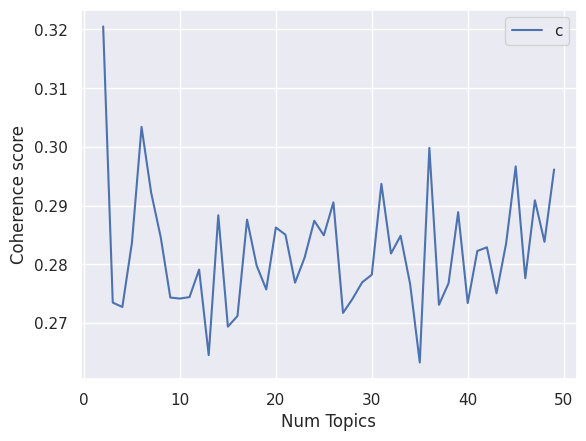

In [ ]:
# Show graph
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Saving the coherence graph as an image file
coherence_graph_save_path = '/work/GitHub_ML_Deepnote/Machine Learning/5. LDA Topic Analysis/coherence_graph.png'
plt.savefig(coherence_graph_save_path)


<Figure size 640x480 with 0 Axes>

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3205
Num Topics = 3  has Coherence Value of 0.2735
Num Topics = 4  has Coherence Value of 0.2727
Num Topics = 5  has Coherence Value of 0.2837
Num Topics = 6  has Coherence Value of 0.3034
Num Topics = 7  has Coherence Value of 0.2922
Num Topics = 8  has Coherence Value of 0.2846
Num Topics = 9  has Coherence Value of 0.2743
Num Topics = 10  has Coherence Value of 0.2742
Num Topics = 11  has Coherence Value of 0.2744
Num Topics = 12  has Coherence Value of 0.2791
Num Topics = 13  has Coherence Value of 0.2645
Num Topics = 14  has Coherence Value of 0.2884
Num Topics = 15  has Coherence Value of 0.2694
Num Topics = 16  has Coherence Value of 0.2712
Num Topics = 17  has Coherence Value of 0.2876
Num Topics = 18  has Coherence Value of 0.2798
Num Topics = 19  has Coherence Value of 0.2757
Num Topics = 20  has Coherence Value of 0.2863
Num Topics = 21  has Coherence Value of 0.285
Num Topics = 22  has Coherence Value of 0.2769
Num Topics = 23  has C

In [ ]:
optimal_model = model_list[14]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

[(0,
  '0.015*"human" + 0.011*"even" + 0.009*"make" + 0.008*"im" + 0.008*"would" + 0.007*"need" + 0.007*"think" + 0.007*"information" + 0.006*"way" + 0.006*"without"'),
 (1,
  '0.016*"ai" + 0.014*"human" + 0.013*"think" + 0.011*"u" + 0.010*"would" + 0.008*"consciousness" + 0.008*"come" + 0.007*"dont" + 0.007*"way" + 0.007*"like"'),
 (2,
  '0.013*"ai" + 0.011*"think" + 0.008*"consciousness" + 0.008*"even" + 0.006*"could" + 0.006*"human" + 0.006*"would" + 0.006*"u" + 0.006*"people" + 0.006*"one"'),
 (3,
  '0.014*"human" + 0.010*"like" + 0.009*"ai" + 0.008*"make" + 0.008*"goal" + 0.007*"would" + 0.006*"get" + 0.006*"even" + 0.006*"im" + 0.006*"think"'),
 (4,
  '0.012*"make" + 0.011*"ai" + 0.006*"know" + 0.006*"human" + 0.006*"youre" + 0.006*"find" + 0.006*"money" + 0.006*"..." + 0.005*"would" + 0.005*"people"'),
 (5,
  '0.013*"ai" + 0.010*"like" + 0.010*"game" + 0.009*"u" + 0.009*"make" + 0.008*"consciousness" + 0.008*"people" + 0.008*"human" + 0.007*"world" + 0.007*"thing"'),
 (6,
  '0.0

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis_2 = pyLDAvis.gensim.prepare(optimal_model, doc_term_matrix, dictionary)
vis_2

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.032277 -0.051872       1        1  16.465877
11    -0.014931 -0.021164       2        1  11.864687
6      0.029147 -0.035397       3        1  10.183789
7      0.015438  0.013374       4        1   8.970344
0      0.044968  0.023107       5        1   6.320122
15    -0.008200 -0.029384       6        1   5.785026
12    -0.002407  0.012538       7        1   5.671226
10     0.024627  0.014092       8        1   5.511345
5      0.009816 -0.035232       9        1   5.168325
9     -0.118933 -0.013325      10        1   4.469081
3      0.009444  0.060224      11        1   4.344583
13     0.012252  0.034588      12        1   3.978758
14    -0.014382 -0.016343      13        1   3.711022
8      0.019336 -0.021806      14        1   2.883817
4     -0.026051  0.046316      15        1   2.498148
2     -0.012401  0.020284      16        1   2.173850, topic_info=        Term        Freq       Total Category  logprob  loglift
5         ai  225.000000  225.000000  Default  30.0000  30.0000
63      make   90.000000   90.000000  Default  29.0000  29.0000
35      even   66.000000   66.000000  Default  28.0000  28.0000
161    think  127.000000  127.000000  Default  27.0000  27.0000
432     like   85.000000   85.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
63      make    1.442129   90.666229  Topic16  -5.3701  -0.3124
535     know    1.159819   47.028275  Topic16  -5.5880   0.1262
125  without    1.076924   32.518718  Topic16  -5.6622   0.4210
769    right    1.051661   30.175315  Topic16  -5.6859   0.4720
135     come    0.989530   44.817693  Topic16  -5.7468   0.0155

[1171 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
950       2  0.154912         ..
950       4  0.154912         ..
950       5  0.154912         ..
950       6  0.154912         ..
950       8  0.309823         ..
...     ...       ...        ...
416      13  0.044425      youre
416      14  0.022212      youre
416      15  0.044425      youre
585      10  0.897976         yr
3106      7  0.640648  yudkowski

[2630 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 12, 7, 8, 1, 16, 13, 11, 6, 10, 4, 14, 15, 9, 5, 3])

In [ ]:
#The visualization with CSS styling for width and height
html_output = pyLDAvis.display(vis_2, False)
html_output.data = html_output.data.replace("80%", "600px").replace("1400px", "600px")


In [ ]:
# Specifying the full path for saving the HTML file
html_save_path = '/work/GitHub_ML_Deepnote/Machine Learning/5. LDA Topic Analysis/corpus_optimal_lda.html'

# Saving as an HTML file
pyLDAvis.save_html(vis_2, html_save_path)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f64215d6-debc-46bd-b273-63565459a66d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>